# Text Mining Project - Stock Sentiment

- Tomás Silva 20230982
- Martim Tavares 20240508
- Santiago Taylor 20240542
- Rita Palma 20240661

# Library and Data Imports

In [ ]:
!pip install emoji
!pip install gensim
!pip install optuna
!pip install accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 590.6/590.6 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 46.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 14.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but yo

In [ ]:
# Uninstall existing versions of gensim and numpy
!pip uninstall gensim numpy -y

# Reinstall gensim and numpy. Pip will install compatible versions.
!pip install gensim numpy

Found existing installation: gensim 4.3.3
Uninstalling gensim-4.3.3:
  Successfully uninstalled gensim-4.3.3
Found existing installation: numpy 1.26.4
Uninstalling numpy-1.26.4:
  Successfully uninstalled numpy-1.26.4
  Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.1 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.1/62.1 kB 5.7 MB/s eta 0:00:00
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (61 kB)
Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.7 MB)
Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (18.3 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
tsfresh 0.21.0 requires scipy>=1.14.0

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
from wordcloud import WordCloud
import os
from collections import Counter
import spacy

from sklearn.model_selection import train_test_split


# NLP Pre‑processing
import re
import emoji
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')

# Classical ML
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, f1_score, precision_score, recall_score
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.base import TransformerMixin

import torch

from transformers import T5Tokenizer, T5EncoderModel, RobertaTokenizer, RobertaForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset

# Word2Vec
from gensim.models import Word2Vec, KeyedVectors
import gensim.downloader as api

# Deep Learning (Bi‑LSTM)
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Input, Masking, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.models import Model


# Transformer (Hugging Face)
from transformers import (AutoTokenizer, AutoModel, AutoModelForSequenceClassification,
                          TrainingArguments, Trainer, DataCollatorWithPadding, logging as hf_logging)
from datasets import Dataset as HFDataset
hf_logging.set_verbosity_error()

import optuna


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [ ]:
train_df.head()

,text,label
0,$BYND - JPMorgan reels in expectations on Beyo...,0
1,$CCL $RCL - Nomura points to bookings weakness...,0
2,"$CX - Cemex cut at Credit Suisse, J.P. Morgan ...",0
3,$ESS: BTIG Research cuts to Neutral https://t....,0
4,$FNKO - Funko slides after Piper Jaffray PT cu...,0


In [ ]:
test_df.head()

,id,text
0,0,ETF assets to surge tenfold in 10 years to $50...
1,1,Here’s What Hedge Funds Think Evolution Petrol...
2,2,$PVH - Phillips-Van Heusen Q3 2020 Earnings Pr...
3,3,China is in the process of waiving retaliatory...
4,4,"Highlight: “When growth is scarce, investors s..."


# 1. Data Exploration

In [ ]:
train_df["label"].unique()

array([0, 1, 2])

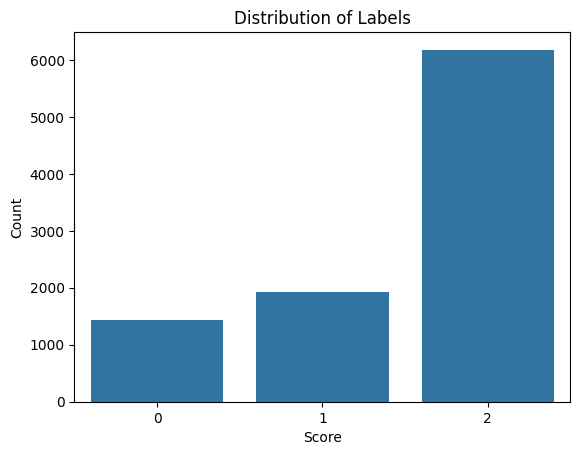

In [ ]:
# Visualize distribution of the label
sns.countplot(data=train_df, x='label')
plt.title("Distribution of Labels")
plt.xlabel("Score")
plt.ylabel("Count")
plt.show()

In [ ]:
train_df.info()
# no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9543 entries, 0 to 9542
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    9543 non-null   object
 1   label   9543 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 149.2+ KB


In [ ]:
train_df["text"][0]

'$BYND - JPMorgan reels in expectations on Beyond Meat https://t.co/bd0xbFGjkT'

In [ ]:
# Fetch wordcount for each tweet
train_df['word_count']  = train_df['text'].apply(lambda x: len(str(x).split(" ")))
train_df[['text','word_count']].head()

,text,word_count
0,$BYND - JPMorgan reels in expectations on Beyo...,10
1,$CCL $RCL - Nomura points to bookings weakness...,14
2,"$CX - Cemex cut at Credit Suisse, J.P. Morgan ...",14
3,$ESS: BTIG Research cuts to Neutral https://t....,7
4,$FNKO - Funko slides after Piper Jaffray PT cu...,10


In [ ]:
train_df["word_count"].describe()

,word_count
count,9543.000000
mean,12.168081
std,4.651245
min,1.000000
25%,9.000000
50%,11.000000
75%,15.000000
max,31.000000


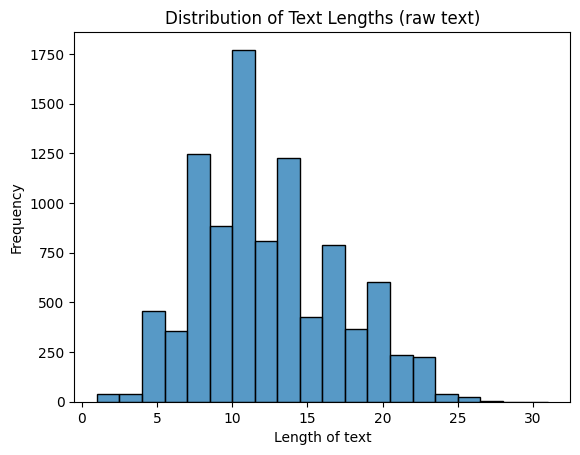

In [ ]:
#Plot distribution of text length
sns.histplot(train_df['word_count'], bins=20)
plt.title("Distribution of Text Lengths (raw text)")
plt.xlabel("Length of text")
plt.ylabel("Frequency")
plt.show()

In [ ]:
all_words = ' '.join(train_df['text']).split()
freq = pd.Series(all_words).value_counts()
freq.sort_values(ascending=False)[0:10]

,count
to,2332
the,1820
of,1464
-,1390
in,1361
on,1136
for,1032
a,970
and,898
The,663


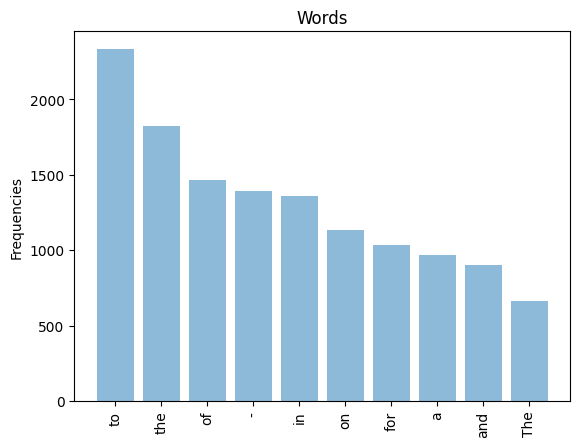

In [ ]:
x_labels = freq.index[0:10]
values = freq[:10]
plt.bar(x_labels, values, align='center', alpha=0.5)
plt.xticks(x_labels)
plt.ylabel('Frequencies')
plt.title('Words')
plt.xticks(rotation=90)
plt.show()

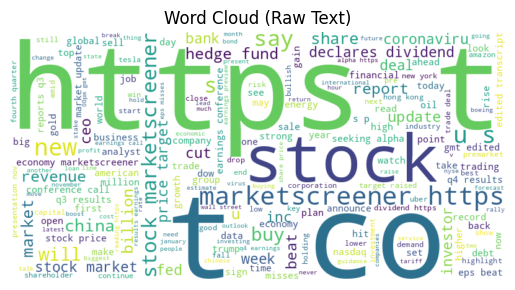

In [ ]:
# Create a word cloud from the raw text
raw_text = ' '.join(train_df['text'].fillna('')).lower()
raw_wc = WordCloud(width=800, height=400, background_color='white').generate(raw_text) #WordCloud removes stop words
plt.imshow(raw_wc, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud (Raw Text)')
plt.show()

## Visualize tweets with emojis

In [ ]:
# Regex to match Unicode emojis
emoji_pattern = re.compile("["
    u"\U0001F600-\U0001F64F"  # emoticons
    u"\U0001F300-\U0001F5FF"  # symbols & pictographs
    u"\U0001F680-\U0001F6FF"  # transport & map
    u"\U0001F1E0-\U0001F1FF"  # flags
    u"\U00002700-\U000027BF"  # dingbats
    u"\U000024C2-\U0001F251"  # enclosed characters
"]+", flags=re.UNICODE)

# Regex to match ASCII emoticons
ascii_emoticon_pattern = re.compile(r"""
    (?:
        [:=;]        # eyes
        [\-^]?       # optional nose
        [\)\(\]/\\]  # mouth
    )
""", re.VERBOSE)

# Combined function to extract both
def extract_emojis_and_emoticons(text):
    text = str(text)
    # 1. Remove URLs
    text_no_urls = re.sub(r"http\S+|www\S+", '', text)

    # 2. Find emojis
    unicode_emojis = emoji_pattern.findall(text_no_urls)

    # 3. Find ASCII emoticons
    ascii_emoticons = ascii_emoticon_pattern.findall(text_no_urls)

    return {
        "unicode_emojis": unicode_emojis,
        "ascii_emoticons": ascii_emoticons,
        "any": bool(unicode_emojis or ascii_emoticons)
    }


In [ ]:
emoji_info = train_df['text'].apply(extract_emojis_and_emoticons)
emoji_df = pd.DataFrame(emoji_info.tolist())

# Combine with your original DataFrame
train_df = pd.concat([train_df, emoji_df], axis=1)

# Check how many tweets contain ANY emoji or emoticon
print(f"Tweets with emojis or emoticons: {train_df['any'].sum()} out of {len(train_df)}")

# View examples
train_df[train_df['any']].head()


Tweets with emojis or emoticons: 50 out of 9543


,text,label,unicode_emojis,ascii_emoticons,any
451,eib: #MustRead➡️EIB Bank Lending #Survey for #...,2,[➡️],[],True
622,LIVE: Fed Chair Jerome Powell speaks on today'...,2,[▶️],[],True
1858,SASA聚酯选用英威达PTA技术,2,"[聚酯选用英威达, 技术]",[],True
3812,⚡️ Wind speeds are up globally. That's good ne...,1,[⚡️],[],True
3879,�� Here's why one great whale offers more in t...,2,[��],[],True


In [ ]:
train_df[train_df['any']]

,text,label,unicode_emojis,ascii_emoticons,any
451,eib: #MustRead➡️EIB Bank Lending #Survey for #...,2,[➡️],[],True
622,LIVE: Fed Chair Jerome Powell speaks on today'...,2,[▶️],[],True
1858,SASA聚酯选用英威达PTA技术,2,"[聚酯选用英威达, 技术]",[],True
3812,⚡️ Wind speeds are up globally. That's good ne...,1,[⚡️],[],True
3879,�� Here's why one great whale offers more in t...,2,[��],[],True
3880,�� Here's why Trump Tower is now one of the le...,2,[��],[],True
3943,:),2,[],[:)],True
3972,☀️ Cranberry farmers turn to solar power for e...,2,[☀️],[],True
3973,❄@GitHub is storing open source code in an Arc...,2,[❄],[],True
3974,⚡️ @sussexuni scientists have developed hologr...,2,[⚡️],[],True


# 2. Corpus split


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(train_df["text"], train_df["label"],
                                                    test_size=0.20,
                                                    random_state=9,
                                                    stratify=train_df["label"])

In [ ]:
len(X_train), len(X_val), len(y_train), len(y_val)

(7634, 1909, 7634, 1909)

# 3. Data Preprocessing


In [ ]:
# Function to clean usernames (remove numbers and simbols)
def clean_username(user):
    return re.sub(r'[^a-zA-Z]', '', user).lower()

# Extract mentions of every tweet
all_mentions = []
for tweet in train_df['text']:
    mentions = re.findall(r'@(\w+)', tweet)
    cleaned = [clean_username(m) for m in mentions]
    all_mentions.extend(cleaned)

# Count mentions and define valud users
threshold = 3
counts = Counter(all_mentions)
valid_users = {u for u, c in counts.items() if c >= threshold}

In [ ]:
print(valid_users)

{'acorns', 'bw', 'madmoneyoncnbc', 'benzinga', 'briansozzi', 'foxbusiness', 'emilymcck', 'heidichung', 'realdonaldtrump', 'tradingnation', 'cnbcmakeit', 'bopinion', 'rickjnewman', 'jimcramer', 'wellsfargo', 'business', 'bcheungz', 'telefenoticias', 'here', 'tictoc', 'marketsmith', 'cmegroup', 'danielhowley'}


In [ ]:
# SpaCy with small model in english
nlp = spacy.load("en_core_web_sm", disable=["parser", "ner"])

# Substitutions by category
SUBSTITUTIONS = {
    'inc': 'company', 'corporation': 'company', 'group': 'company', 'holding': 'company',
    'report': 'news', 'update': 'news', 'presentation': 'news', 'transcript': 'news',
    'eps': 'earnings', 'result': 'earnings', 'revenue': 'earnings', 'earning': 'earnings',
    'cut': 'valuation', 'beat': 'valuation', 'miss': 'valuation', 'price': 'valuation', 'target': 'valuation',
    'analyst': 'person', 'ceo': 'person', 'investor': 'person', 'hedge': 'person',
    'share': 'stock', 'buy': 'stock', 'trade': 'stock', 'trading': 'stock',
    'market': 'macro', 'economy': 'macro', 'finance': 'macro', 'fed': 'macro', 'rate': 'macro', 'capital': 'macro',
    'day': 'time', 'week': 'time', 'year': 'time', 'first': 'time', 'next': 'time', 'q': 'time',
    'call': 'event', 'conference': 'event', 'plan': 'event',
    'unitedstatess': 'unitedstates', 'unitedstate': 'unitedstates'
}

# Adicional stopwords
CUSTOM_STOPWORDS = set([
    'say', 'get', 'see', 'one', 'may', 'look', 'here', 'good', 'could', 'read',
    'back', 'marketscreener', 'there'
]) # 'u', 'q', '@user'

WORD_NORMALIZATION = {
    r"\bU\.S\.A?\b": "united_states",
    r"\bU\.K\.\b": "united_kingdom",
    r"\bUK\b": "united_kingdom",
    r"\bUS\b": "united_states",
    r"\bU\b": "united_states",
    r"\bJ\.P\.?\s?Morgan\b": "jpmorgan",
    r"\bJP\s?Morgan\b": "jpmorgan",
    r"eps misses by \$\d+\.\d{2}": "eps_miss",
    r"eps beats by \$\d+\.\d{2}": "eps_miss"
}

def normalize_words(text):
    for pattern, replacement in WORD_NORMALIZATION.items():
        text = re.sub(pattern, replacement, text, flags=re.IGNORECASE)
    return text


In [ ]:
def clean(text_list, remove_emojis=True, mentions=True, replace_words=True, extra_stopwords=True, remove_punctuation=True, remove_stopwords=True, lemmatize=True, stemming=True):

  updates = []

  stop = set(stopwords.words('english'))
  lemma = WordNetLemmatizer()
  stemmer = SnowballStemmer('english')

  # Regex to match Unicode emojis
  emoji_pattern = re.compile("["
      u"\U0001F600-\U0001F64F"  # emoticons
      u"\U0001F300-\U0001F5FF"  # symbols & pictographs
      u"\U0001F680-\U0001F6FF"  # transport & map
      u"\U0001F1E0-\U0001F1FF"  # flags
      u"\U00002700-\U000027BF"  # dingbats
      u"\U000024C2-\U0001F251"  # enclosed characters
    "]+", flags=re.UNICODE)

  # Mapping for ASCII emoticons
  ascii_emoticons = {
    r":\)": "happy",
    r":-\)": "happy",
    r":\(": "sad",
    r":-\(": "sad",
    r";\)": "wink",
    r";-\)": "wink",
    r":/": "uncertain",
    r":-\|": "neutral",
  }


  for j in tqdm(text_list):

      text = j

      # 1. LOWERCASE TEXT
      text = text.lower()

      # 2. REMOVE URLS
      text = re.sub(r"http\S+|www\S+", '', text)  # remove URLs

      # 3. SUBSTITUTE @usernames
      if mentions:
        text = re.sub(
            r'@(\w+)',
            lambda m: f"@{clean_username(m.group(1))}"
            if clean_username(m.group(1)) in valid_users
            else '',
            text
        )

      text = re.sub(r"\n", ' ', text)  # remove \n
      text = re.sub(r"-", ' ', text)  # remove -

      # 4. HANDLE EMOJIS AND ASCII EMOTICONS
      if remove_emojis:
        text = emoji_pattern.sub(r'', text)

        for pattern in ascii_emoticons.keys():
          text = re.sub(pattern, ' ', text)

      else:
        text = emoji.demojize(text, delimiters=(" ", " ")) # convert emojis into tokens

        for pattern, replacement in ascii_emoticons.items():
          text = re.sub(pattern, replacement, text)



      # 5. REMOVE PUNCTUATION
      if remove_punctuation:
        text = re.sub(f"[{re.escape(string.punctuation)}]", '', text)

      if replace_words:
        text =  normalize_words(text)

      # 6. TOKENIZE TEXT
      tokens = word_tokenize(text)

      # 7. REMOVE STOPWORDS
      if remove_stopwords:
        tokens = [word for word in tokens if word not in stop] # and word not in CUSTOM_STOPWORDS

      # 8. LEMMATIZE TEXT
      if lemmatize:
        tokens = [lemma.lemmatize(word) for word in tokens]

      # 9. STEMMING TEXT
      if stemming:
        tokens = [stemmer.stem(word) for word in tokens]

      if extra_stopwords:
        tokens = [word for word in tokens if word not in CUSTOM_STOPWORDS]
        tokens = [SUBSTITUTIONS.get(tok, tok) for tok in tokens]

      updates.append(" ".join(tokens))

  return updates

In [ ]:
updates = clean(X_train)

100%|██████████| 7634/7634 [00:06<00:00, 1157.70it/s]


In [ ]:
updates_no_stem = clean(X_train, stemming=False)

100%|██████████| 7634/7634 [00:05<00:00, 1330.63it/s]


In [ ]:
updates[1]

'live macro chair jerom powel speak today decis hold macro'

In [ ]:
updates_no_stem[1]

'live macro chair jerome powell speaks today decision hold macro'

In [ ]:
X_train.loc[622]

"LIVE: Fed Chair Jerome Powell speaks on today's decision to hold rates ▶️\n\nhttps://t.co/Wfg74SaImY"

In [ ]:
def get_top_words(clean_texts, n=100):
    all_tokens = " ".join(clean_texts).split()
    counter = Counter(all_tokens)
    return counter.most_common(n)

top_words = get_top_words(updates)
for word, freq in top_words:
    print(f"{word}: {freq}")

stock: 1872
valuation: 1049
time: 865
macro: 757
news: 551
’: 506
person: 389
united_st: 387
company: 375
new: 329
event: 321
earnings: 314
earn: 302
fund: 254
economi: 254
china: 246
2019: 243
dividend: 241
marketscreen: 238
updat: 238
2020: 229
deal: 204
bank: 200
revenu: 180
oil: 177
invest: 176
busi: 172
q4: 163
present: 161
trump: 159
declar: 159
energi: 157
coronavirus: 156
ep: 155
marketscreener…: 152
compani: 150
hedg: 145
billion: 138
top: 136
sale: 132
q3: 131
rais: 130
hold: 129
financi: 128
confer: 126
global: 124
quarter: 124
high: 122
financ: 120
announc: 118
open: 118
growth: 117
gain: 116
million: 111
19: 111
3: 110
rise: 109
make: 107
industri: 106
seek: 105
corpor: 104
1: 101
sell: 100
capit: 99
“: 98
go: 98
expect: 97
gold: 94
offer: 93
take: 91
close: 89
highlight: 89
2: 88
continu: 87
low: 87
job: 86
sp: 86
record: 85
higher: 84
end: 84
point: 84
hit: 84
5: 83
credit: 82
move: 81
edit: 80
forecast: 80
dow: 79
500: 79
today: 78
nasdaq: 78
month: 77
sign: 77
watch: 7

# 3.1. GRID SEARCH

We will run a gridsearch with different preprocessing techniques to select the best one to train our models

In [ ]:
clean_variants = {
    "default": clean(X_train),
    "basic": clean(X_train, remove_emojis=True, mentions=False, replace_words=False, extra_stopwords=False, remove_stopwords=False, stemming=False),
    "no_stemming": clean(X_train, stemming=False, remove_emojis=False),
    "no_emoji_no_mentions": clean(X_train, stemming=False, remove_emojis=True, mentions=False, replace_words=False, extra_stopwords=False, remove_stopwords=False),
    "no_emojis_only": clean(X_train, stemming=False, remove_emojis=True, replace_words=False, extra_stopwords=False, remove_stopwords=False),
    "no_mentions_only": clean(X_train, stemming=False, remove_emojis=False, mentions=False, replace_words=False, extra_stopwords=False, remove_stopwords=False)
}

val_variants = {
    "default": clean(X_val),
    "basic": clean(X_val, remove_emojis=True, mentions=False, replace_words=False, extra_stopwords=False, remove_stopwords=False, stemming=False),
    "no_stemming": clean(X_val, stemming=False, remove_emojis=False),
    "no_emoji_no_mentions": clean(X_val, stemming=False, remove_emojis=True, mentions=False, replace_words=False, extra_stopwords=False, remove_stopwords=False),
    "no_emojis_only": clean(X_val, stemming=False, remove_emojis=True, replace_words=False, extra_stopwords=False, remove_stopwords=False),
    "no_mentions_only": clean(X_val, stemming=False, remove_emojis=False, mentions=False, replace_words=False, extra_stopwords=False, remove_stopwords=False),

}

100%|██████████| 1909/1909 [00:00<00:00, 3957.95it/s]


In [ ]:
# Personalized transformer to convert sparse vectors to dense
class DenseTransformer(TransformerMixin):
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        return X.toarray()


# base pipeline
pipeline = Pipeline([
    ("vectorizer", CountVectorizer()),
    ("classifier", LogisticRegression())
])

# Combinations of vectorizer + model
param_grid = [
    {
        "vectorizer": [CountVectorizer(binary=True, min_df=2)],
        "classifier": [KNeighborsClassifier(n_neighbors=10, metric='cosine', weights='distance')]
    },
    {
        "vectorizer": [TfidfVectorizer(ngram_range=(1,2), max_df=0.8)],
        "classifier": [MultinomialNB()]
    },
    {
        "vectorizer": [TfidfVectorizer(ngram_range=(1,2), max_df=0.8)],
        "classifier": [LogisticRegression(random_state=0, max_iter=1000)]
    },
    {
        "vectorizer": [TfidfVectorizer(ngram_range=(1,2), max_df=0.8)],
        "classifier": [LinearSVC(C=0.5, max_iter=1000)]
    },
    {
        "vectorizer": [TfidfVectorizer(ngram_range=(1,2), max_df=0.8)],
        "classifier": [RidgeClassifier(alpha=0.5)]
    },
    {
        "vectorizer": [TfidfVectorizer(ngram_range=(1,2), max_df=0.8)],
        "classifier": [SGDClassifier(loss="log_loss", penalty="l2", max_iter=1000, random_state=0)]
    },
    {
        "vectorizer": [HashingVectorizer(n_features=2**12, alternate_sign=False)],
        "classifier": [LogisticRegression(max_iter=1000)]
    },


]


In [ ]:
# Evaluation helper
def evaluate(y_true, y_pred, title="Model"):
    print(f"\n=== {title} ===")
    print(classification_report(y_true, y_pred, digits=3))
    cm = confusion_matrix(y_true, y_pred)
    ConfusionMatrixDisplay(cm).plot(cmap="Blues")
    plt.title(title)
    plt.show()


=== Testing version: default ===

=== default - Best Model ===
              precision    recall  f1-score   support

           0      0.651     0.486     0.557       288
           1      0.699     0.629     0.662       385
           2      0.843     0.919     0.879      1236

    accuracy                          0.795      1909
   macro avg      0.731     0.678     0.699      1909
weighted avg      0.785     0.795     0.787      1909



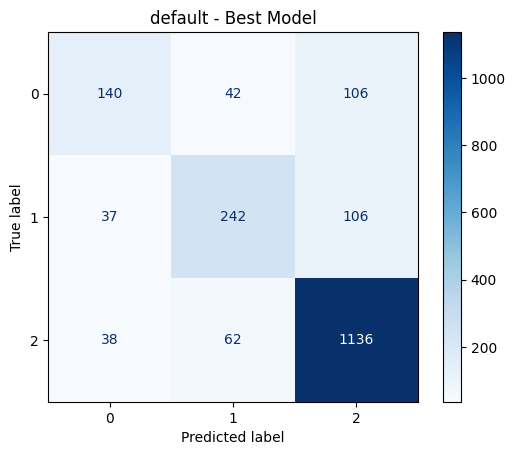

Best combination: {'classifier': RidgeClassifier(alpha=0.5), 'vectorizer': TfidfVectorizer(max_df=0.8, ngram_range=(1, 2))}

=== Testing version: basic ===

=== basic - Best Model ===
              precision    recall  f1-score   support

           0      0.704     0.528     0.603       288
           1      0.741     0.675     0.707       385
           2      0.850     0.923     0.885      1236

    accuracy                          0.814      1909
   macro avg      0.765     0.709     0.732      1909
weighted avg      0.806     0.814     0.807      1909



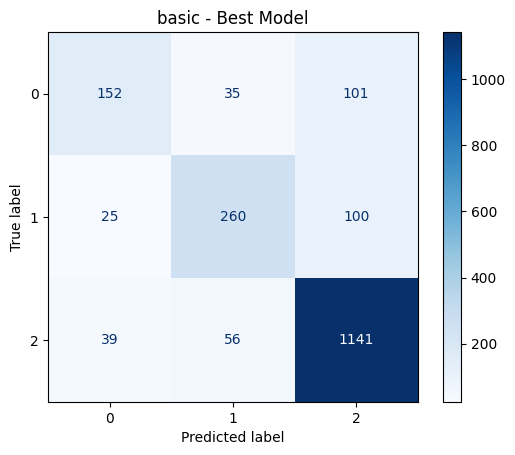

Best combination: {'classifier': RidgeClassifier(alpha=0.5), 'vectorizer': TfidfVectorizer(max_df=0.8, ngram_range=(1, 2))}

=== Testing version: no_stemming ===

=== no_stemming - Best Model ===
              precision    recall  f1-score   support

           0      0.659     0.476     0.552       288
           1      0.705     0.652     0.677       385
           2      0.842     0.917     0.878      1236

    accuracy                          0.797      1909
   macro avg      0.735     0.681     0.703      1909
weighted avg      0.787     0.797     0.788      1909



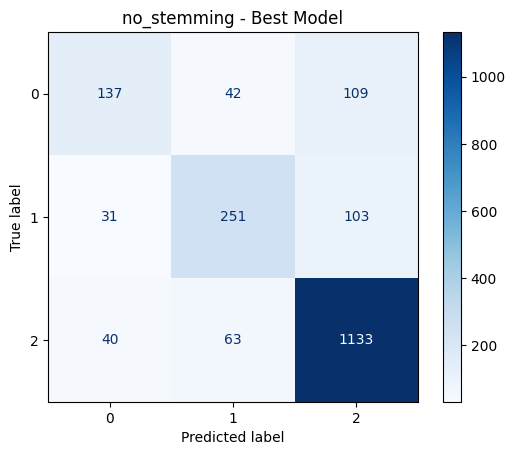

Best combination: {'classifier': RidgeClassifier(alpha=0.5), 'vectorizer': TfidfVectorizer(max_df=0.8, ngram_range=(1, 2))}

=== Testing version: no_emoji_no_mentions ===

=== no_emoji_no_mentions - Best Model ===
              precision    recall  f1-score   support

           0      0.704     0.528     0.603       288
           1      0.741     0.675     0.707       385
           2      0.850     0.923     0.885      1236

    accuracy                          0.814      1909
   macro avg      0.765     0.709     0.732      1909
weighted avg      0.806     0.814     0.807      1909



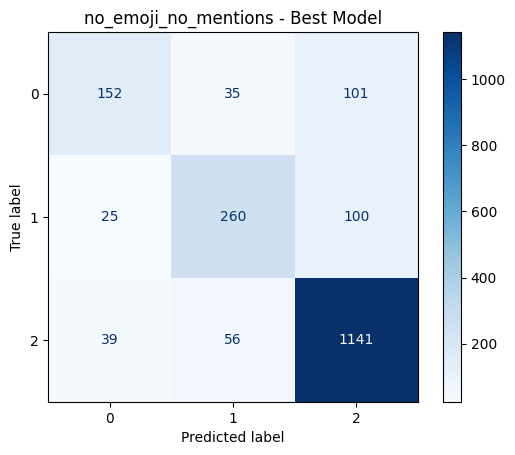

Best combination: {'classifier': RidgeClassifier(alpha=0.5), 'vectorizer': TfidfVectorizer(max_df=0.8, ngram_range=(1, 2))}

=== Testing version: no_emojis_only ===

=== no_emojis_only - Best Model ===
              precision    recall  f1-score   support

           0      0.704     0.528     0.603       288
           1      0.741     0.678     0.708       385
           2      0.851     0.923     0.886      1236

    accuracy                          0.814      1909
   macro avg      0.765     0.710     0.732      1909
weighted avg      0.807     0.814     0.807      1909



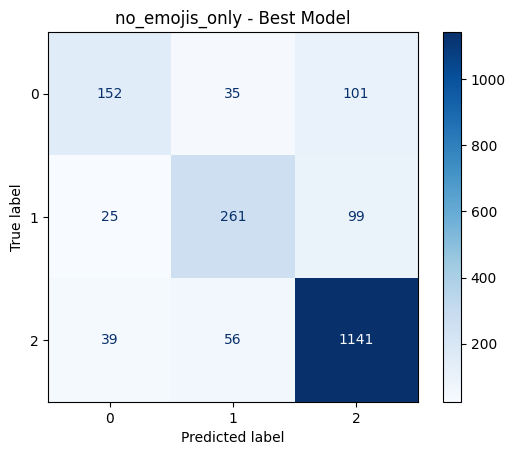

Best combination: {'classifier': RidgeClassifier(alpha=0.5), 'vectorizer': TfidfVectorizer(max_df=0.8, ngram_range=(1, 2))}

=== Testing version: no_mentions_only ===

=== no_mentions_only - Best Model ===
              precision    recall  f1-score   support

           0      0.704     0.528     0.603       288
           1      0.741     0.675     0.707       385
           2      0.850     0.923     0.885      1236

    accuracy                          0.814      1909
   macro avg      0.765     0.709     0.732      1909
weighted avg      0.806     0.814     0.807      1909



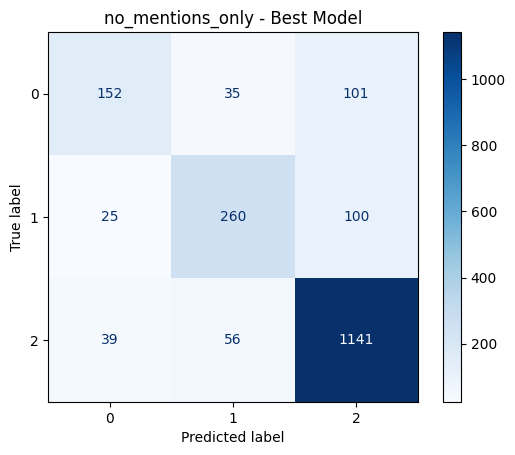

Best combination: {'classifier': RidgeClassifier(alpha=0.5), 'vectorizer': TfidfVectorizer(max_df=0.8, ngram_range=(1, 2))}


In [ ]:
for name, X_clean in clean_variants.items():
    print(f"\n=== Testing version: {name} ===")

    grid = GridSearchCV(pipeline, param_grid, scoring='f1_macro', cv=3)
    grid.fit(X_clean, y_train)

    y_pred = grid.predict(val_variants[name])
    evaluate(y_val, y_pred, title=f"{name} - Best Model")
    print("Best combination:", grid.best_params_)


Based on the grid search results, there are 4 variants of preprocessing that perform identically and yield better results:
- basic
- no_emojis_nomentions
- no_emojis_only
- no_mentions_only

We will train our models with the basic preprocessing

# 4. Feature Engineering and Classification Models


### We implement **seven** pipelines:
1. Bag‑of‑Words + KNN (baseline, fast)  
2. TF-IDF + GaussianNB
3. TF-IDF + Logistic Regression
4. T5 Encoder + Logistic Regression
5. Word2Vec (averaged) + Bi‑LSTM
6. Transformer encoder (DistilBERT) fine‑tuned via
Hugging Face
7. RoBERTa


In [ ]:
# Evaluation helper
def evaluate(y_true, y_pred, title="Model"):
    print(f"\n=== {title} ===")
    print(classification_report(y_true, y_pred, digits=3))
    cm = confusion_matrix(y_true, y_pred)
    ConfusionMatrixDisplay(cm).plot(cmap="Blues")
    plt.title(title)
    plt.show()

Stronger preprocessing used for pipelines 1, 2, 3 and 5

Since for tranformer models minimal text cleaning is usually better and we don't need to apply heavy preprocessing techniques:
- For the T5 encoder (pipeline 4) we only lowercased the text and removed URLs
- For RoBERTa and DistilBERT we used the raw dataset

In [ ]:
# clean train dataset keeping emojis
clean_train = clean(X_train, remove_emojis=True, mentions=False, replace_words=False, extra_stopwords=False, remove_stopwords=False, stemming=False)

# clean val dataset keeping emojis
clean_val = clean(X_val, remove_emojis=True, mentions=False, replace_words=False, extra_stopwords=False, remove_stopwords=False, stemming=False)

100%|██████████| 1909/1909 [00:00<00:00, 6995.11it/s]


# 4.1. BoW + KNN


=== BOW + KNN (train) ===
              precision    recall  f1-score   support

           0      0.999     0.999     0.999      1154
           1      0.999     0.999     0.999      1538
           2      1.000     1.000     1.000      4942

    accuracy                          0.999      7634
   macro avg      0.999     0.999     0.999      7634
weighted avg      0.999     0.999     0.999      7634



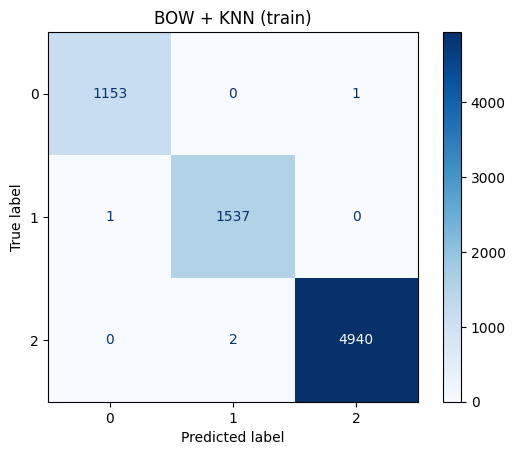


=== BOW + KNN (val) ===
              precision    recall  f1-score   support

           0      0.698     0.361     0.476       288
           1      0.730     0.582     0.647       385
           2      0.802     0.943     0.866      1236

    accuracy                          0.782      1909
   macro avg      0.743     0.628     0.663      1909
weighted avg      0.772     0.782     0.763      1909



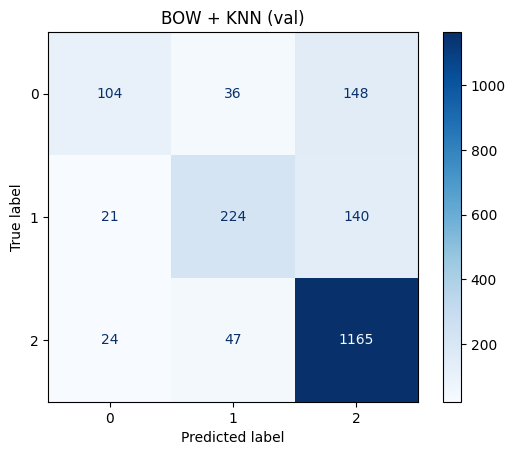

In [ ]:
# Vectorizer (binary presence like lab1)
bow_vec = CountVectorizer(binary=True, min_df=2)
X_train_bow = bow_vec.fit_transform(clean_train)
X_val_bow   = bow_vec.transform(clean_val)

# KNN Classifier
knn = KNeighborsClassifier(n_neighbors=10, metric='cosine', weights='distance')
knn.fit(X_train_bow, y_train)

knn_pred_val = knn.predict(X_val_bow)
knn_pred_train = knn.predict(X_train_bow)

evaluate(y_train, knn_pred_train, title="BOW + KNN (train)")
evaluate(y_val, knn_pred_val, title="BOW + KNN (val)")

# 4.2. TF-IDF + GaussianNB

In [ ]:
tfidf = TfidfVectorizer(max_df=6107, ngram_range=(1,2)) # if words appear in more than 80% of documents then ignore them (domain specific stop words)

X_train_tfidf = tfidf.fit_transform(clean_train).toarray()
X_val_tfidf = tfidf.transform(clean_val).toarray()

X_train_tfidf.shape, y_train.shape, X_val_tfidf.shape, y_val.shape

((7634, 65376), (7634,), (1909, 65376), (1909,))


=== TF-IDF + GNB (train) ===
              precision    recall  f1-score   support

           0      0.988     1.000     0.994      1154
           1      0.993     0.999     0.996      1538
           2      1.000     0.995     0.998      4942

    accuracy                          0.997      7634
   macro avg      0.994     0.998     0.996      7634
weighted avg      0.997     0.997     0.997      7634



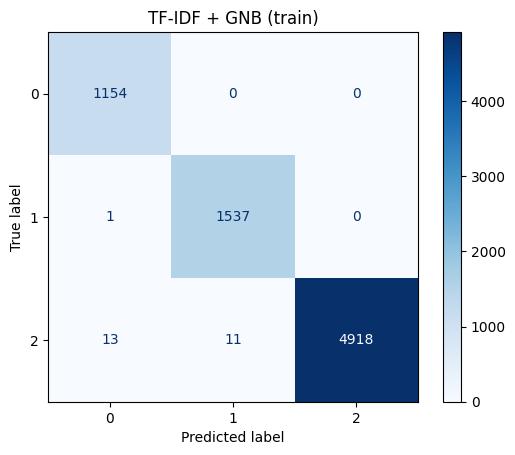


=== TF-IDF + GNB (val) ===
              precision    recall  f1-score   support

           0      0.494     0.451     0.472       288
           1      0.622     0.522     0.568       385
           2      0.803     0.859     0.830      1236

    accuracy                          0.730      1909
   macro avg      0.640     0.611     0.623      1909
weighted avg      0.720     0.730     0.723      1909



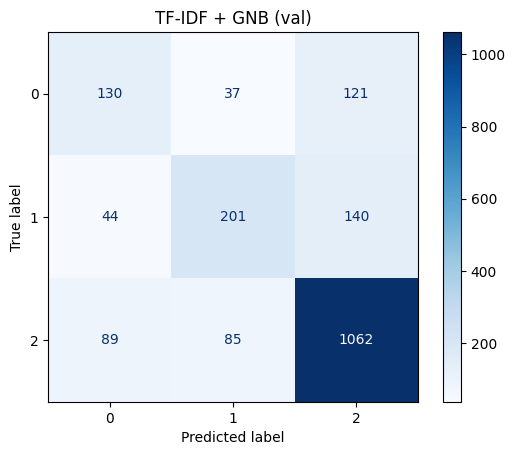

In [ ]:
nb = GaussianNB()
nb.fit(X_train_tfidf, y_train)

nb_pred_val = nb.predict(X_val_tfidf)
nb_pred_train = nb.predict(X_train_tfidf)

evaluate(y_train, nb_pred_train, title="TF-IDF + GNB (train)")
evaluate(y_val, nb_pred_val, title="TF-IDF + GNB (val)")

# 4.3. TF-IDF + Logistic Regression


=== TF-IDF + LR - train ===
              precision    recall  f1-score   support

           0      0.987     0.588     0.737      1154
           1      0.979     0.740     0.843      1538
           2      0.852     0.997     0.919      4942

    accuracy                          0.883      7634
   macro avg      0.939     0.775     0.833      7634
weighted avg      0.898     0.883     0.876      7634



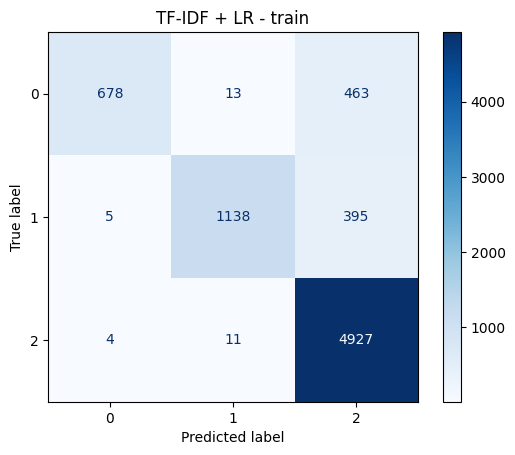


=== TF-IDF + LR - val ===
              precision    recall  f1-score   support

           0      0.784     0.340     0.475       288
           1      0.812     0.548     0.654       385
           2      0.781     0.964     0.863      1236

    accuracy                          0.786      1909
   macro avg      0.792     0.617     0.664      1909
weighted avg      0.788     0.786     0.762      1909



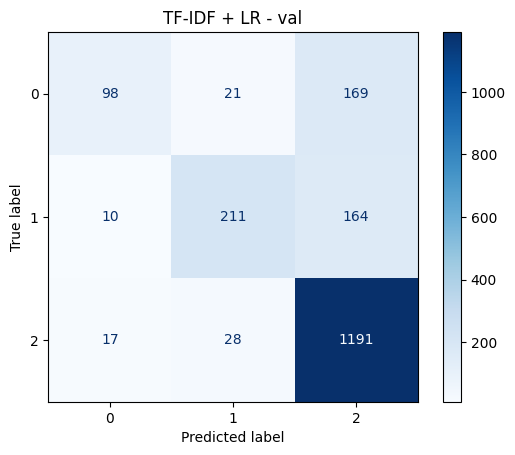

In [ ]:
lr = LogisticRegression(random_state=0)
lr.fit(X_train_tfidf,y_train)

lr_pred_val = lr.predict(X_val_tfidf)
lr_pred_train = lr.predict(X_train_tfidf)

evaluate(y_train, lr_pred_train, title="TF-IDF + LR - train")
evaluate(y_val, lr_pred_val, title="TF-IDF + LR - val")

# 4.4. T5 Encoder + Logistic Regression

Apply a simpler cleaning:
- lower casing
- removing URLs

In [ ]:
# clean train dataset only applying lowercasing and removing URLs
clean_train_t5 = clean(X_train, remove_emojis=True, remove_punctuation=False, mentions=False, replace_words=False, extra_stopwords=False, remove_stopwords=False, lemmatize=False, stemming=False)

# clean val dataset only applying lowercasing and removing URLs
clean_val_t5 = clean(X_val, remove_emojis=True, remove_punctuation=False, mentions=False, replace_words=False, extra_stopwords=False, remove_stopwords=False, lemmatize=False, stemming=False)

100%|██████████| 1909/1909 [00:00<00:00, 7952.99it/s]


In [ ]:
# Load the T5 encoder and tokenizer
tokenizer = T5Tokenizer.from_pretrained("t5-base")
encoder = T5EncoderModel.from_pretrained("t5-base")
encoder.eval()  # inference mode


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/892M [00:00<?, ?B/s]

T5EncoderModel(
  (shared): Embedding(32128, 768)
  (encoder): T5Stack(
    (embed_tokens): Embedding(32128, 768)
    (block): ModuleList(
      (0): T5Block(
        (layer): ModuleList(
          (0): T5LayerSelfAttention(
            (SelfAttention): T5Attention(
              (q): Linear(in_features=768, out_features=768, bias=False)
              (k): Linear(in_features=768, out_features=768, bias=False)
              (v): Linear(in_features=768, out_features=768, bias=False)
              (o): Linear(in_features=768, out_features=768, bias=False)
              (relative_attention_bias): Embedding(32, 12)
            )
            (layer_norm): T5LayerNorm()
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (1): T5LayerFF(
            (DenseReluDense): T5DenseActDense(
              (wi): Linear(in_features=768, out_features=3072, bias=False)
              (wo): Linear(in_features=3072, out_features=768, bias=False)
              (dropout): Dropout(p=0.1, 

In [ ]:
def get_t5_embeddings(texts, batch_size=32):
    embeddings = []

    for i in range(0, len(texts), batch_size):
        batch = texts[i:i+batch_size]
        with torch.no_grad():
            inputs = tokenizer(batch, padding=True, truncation=True, return_tensors="pt")
            outputs = encoder(**inputs)
            pooled = outputs.last_hidden_state.mean(dim=1)
            embeddings.append(pooled)

    return torch.cat(embeddings).cpu().numpy()

In [ ]:
X_train_t5 = get_t5_embeddings(clean_train_t5)

X_val_t5 = get_t5_embeddings(clean_val_t5)


=== T5 Encoder + LR - train ===
              precision    recall  f1-score   support

           0      0.801     0.644     0.714      1154
           1      0.819     0.726     0.770      1538
           2      0.869     0.939     0.903      4942

    accuracy                          0.852      7634
   macro avg      0.830     0.770     0.795      7634
weighted avg      0.848     0.852     0.847      7634



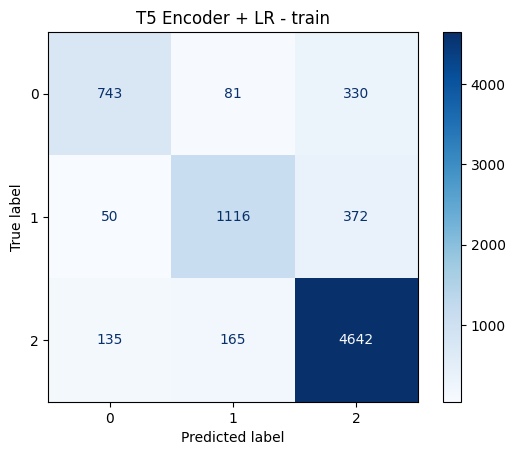


=== T5 Encoder + LR - val ===
              precision    recall  f1-score   support

           0      0.644     0.521     0.576       288
           1      0.738     0.660     0.697       385
           2      0.839     0.905     0.871      1236

    accuracy                          0.797      1909
   macro avg      0.740     0.695     0.714      1909
weighted avg      0.789     0.797     0.791      1909



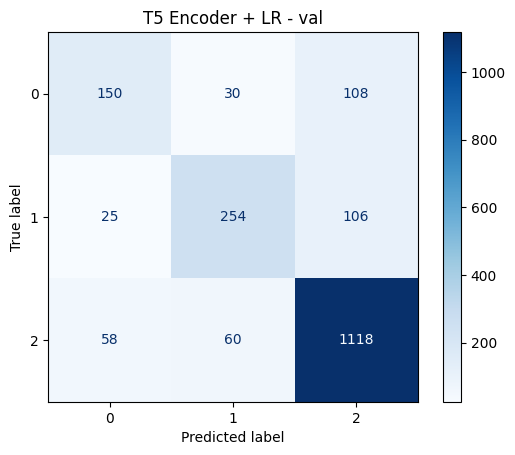

In [ ]:
# Train a simple classifier
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train_t5, y_train)

# Evaluate
t5_pred_val = clf.predict(X_val_t5)
t5_pred_train = clf.predict(X_train_t5)

evaluate(y_train, t5_pred_train, title="T5 Encoder + LR - train")
evaluate(y_val, t5_pred_val, title="T5 Encoder + LR - val")

# 4.5. Word2Vec + Bi-LSTM

In [ ]:
wv = api.load("glove-twitter-50")

EMB_SIZE = wv.vector_size
#MAX_LEN  = clean_train.apply(lambda t: len(t.split())).max()
MAX_LEN = max(len(t.split()) for t in clean_train)
print("Max tweet length:", MAX_LEN)

[==================================================] 100.0% 199.5/199.5MB downloaded
Max tweet length: 31


In [ ]:
# Helper – convert sentence to list of vectors
def sent2vec(sent):
    tokens = sent.split()
    return [wv[tok] for tok in tokens if tok in wv]

# Build 3‑D arrays
def corpus2tensor(corpus):
    seqs = [sent2vec(sent) for sent in corpus]
    # Pad with zeros
    padded = pad_sequences(seqs, maxlen=MAX_LEN, dtype='float32', padding='post', truncating='post')
    return padded

In [ ]:
X_train_w2v = corpus2tensor(clean_train)
X_val_w2v   = corpus2tensor(clean_val)

In [ ]:
print("Tensor shapes:", X_train_w2v.shape, X_val_w2v.shape)

Tensor shapes: (7634, 31, 50) (1909, 31, 50)


In [ ]:
# Build Bi‑LSTM model
def build_bilstm(max_len, emb_size, lstm_units=64, drop_rate=0.3):
    inp = Input(shape=(max_len, emb_size))
    x   = Masking(mask_value=0.0)(inp)
    x   = Bidirectional(LSTM(lstm_units))(x)
    x   = Dropout(drop_rate)(x)
    out = Dense(3, activation='softmax')(x)
    model = Model(inp, out)
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [ ]:
lstm_model = build_bilstm(MAX_LEN, EMB_SIZE)
print(lstm_model.summary())

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 31, 50)    │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ not_equal           │ (None, 31, 50)    │          0 │ input_layer[0][0] │
│ (NotEqual)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ masking (Masking)   │ (None, 31, 50)    │          0 │ input_layer[0][0] │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ any (Any)           │ (None, 31)        │          0 │ not_equal[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bidirectional       │ (None, 128)       │     58,880 │ masking[0][0],    │
│ (Bidirectional)     │                   │            │ any[0][0]         │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dropout (Dropout)   │ (None, 128)       │          0 │ bidirectional[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 3)         │        387 │ dropout[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 59,267 (231.51 KB)

 Trainable params: 59,267 (231.51 KB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
# Train (few epochs to avoid overfit for demo)
hist = lstm_model.fit(
    X_train_w2v, y_train,
    validation_data=(X_val_w2v, y_val),
    epochs=6, batch_size=32, verbose=2)

Epoch 1/6
239/239 - 15s - 64ms/step - accuracy: 0.6706 - loss: 0.7925 - val_accuracy: 0.7082 - val_loss: 0.7164
Epoch 2/6
239/239 - 20s - 84ms/step - accuracy: 0.7064 - loss: 0.6926 - val_accuracy: 0.7166 - val_loss: 0.6783
Epoch 3/6
239/239 - 9s - 37ms/step - accuracy: 0.7303 - loss: 0.6523 - val_accuracy: 0.7407 - val_loss: 0.6384
Epoch 4/6
239/239 - 10s - 42ms/step - accuracy: 0.7439 - loss: 0.6106 - val_accuracy: 0.7438 - val_loss: 0.6303
Epoch 5/6
239/239 - 11s - 47ms/step - accuracy: 0.7702 - loss: 0.5640 - val_accuracy: 0.7596 - val_loss: 0.6149
Epoch 6/6
239/239 - 10s - 43ms/step - accuracy: 0.7878 - loss: 0.5293 - val_accuracy: 0.7643 - val_loss: 0.5899



=== Word2Vec + Bi‑LSTM (train) ===
              precision    recall  f1-score   support

           0      0.726     0.582     0.646      1154
           1      0.744     0.634     0.685      1538
           2      0.855     0.934     0.893      4942

    accuracy                          0.820      7634
   macro avg      0.775     0.717     0.741      7634
weighted avg      0.813     0.820     0.813      7634



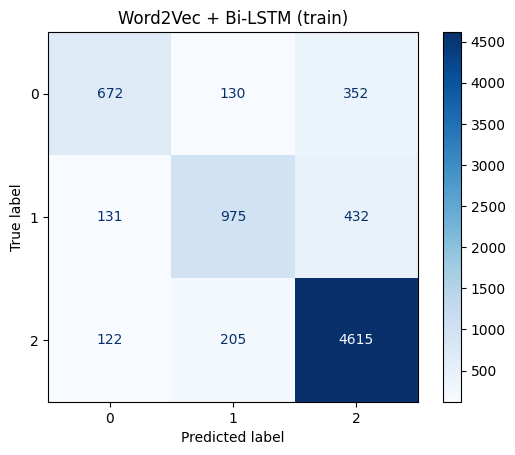


=== Word2Vec + Bi‑LSTM (val) ===
              precision    recall  f1-score   support

           0      0.534     0.462     0.495       288
           1      0.663     0.556     0.605       385
           2      0.832     0.900     0.864      1236

    accuracy                          0.764      1909
   macro avg      0.676     0.639     0.655      1909
weighted avg      0.753     0.764     0.756      1909



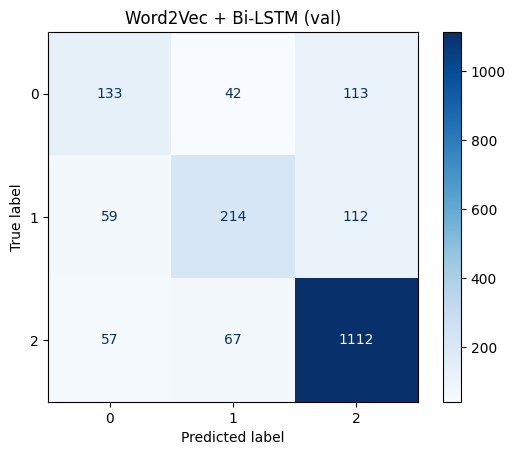

In [ ]:
# Evaluation
lstm_pred_val = lstm_model.predict(X_val_w2v, verbose=0).argmax(axis=1)
lstm_pred_train = lstm_model.predict(X_train_w2v, verbose=0).argmax(axis=1)

evaluate(y_train, lstm_pred_train, title="Word2Vec + Bi‑LSTM (train)")
evaluate(y_val, lstm_pred_val, title="Word2Vec + Bi‑LSTM (val)")

# 4.6. DistlBERT


Here we use the raw dataset

In [ ]:
checkpoint = "distilbert-base-uncased"
num_labels = 3

# Tokenizer & datasets
tokenizer = AutoTokenizer.from_pretrained(checkpoint)

# Encode function (as in lab5)
MAX_TOKENS = 128

def encode_batch(texts):
    return tokenizer(texts, padding=True, truncation=True, max_length=MAX_TOKENS, return_tensors='pt')

In [ ]:
dev = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Device:", dev)

Device: cuda


In [ ]:
train_enc = encode_batch(X_train.tolist())
val_enc   = encode_batch(X_val.tolist())

In [ ]:
train_dataset = torch.utils.data.TensorDataset(train_enc['input_ids'], train_enc['attention_mask'], torch.tensor(y_train.values))
val_dataset   = torch.utils.data.TensorDataset(val_enc['input_ids'], val_enc['attention_mask'],   torch.tensor(y_val.values))

In [ ]:
model = AutoModelForSequenceClassification.from_pretrained(checkpoint, num_labels=num_labels).to(dev)

In [ ]:
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [ ]:
SEED = 221

t_args = TrainingArguments(
    output_dir="./bert-sentiment",
    eval_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=32,
    num_train_epochs=3,
    weight_decay=0.01,
    seed=SEED,
    logging_steps=50,
    report_to="none" # Explicitly disable logging integrations
)

In [ ]:
# Convert to HF Datasets using from_dict
hf_train = HFDataset.from_dict({
    'input_ids': train_enc['input_ids'].tolist(),  # Convert tensors to lists of integers
    'attention_mask': train_enc['attention_mask'].tolist(), # Convert tensors to lists of integers
    'label': y_train.values.tolist() # Convert numpy array to list
})

hf_val = HFDataset.from_dict({
    'input_ids': val_enc['input_ids'].tolist(),    # Convert tensors to lists of integers
    'attention_mask': val_enc['attention_mask'].tolist(),  # Convert tensors to lists of integers
    'label': y_val.values.tolist()   # Convert numpy array to list
})

In [ ]:
trainer = Trainer(model=model, args=t_args, train_dataset=hf_train, eval_dataset=hf_val,
                  data_collator=data_collator, tokenizer=tokenizer)

<ipython-input-96-135427151>:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(model=model, args=t_args, train_dataset=hf_train, eval_dataset=hf_val,


In [ ]:
os.environ["WANDB_DISABLED"] = "true"
trainer.train()

{'loss': 0.9092, 'grad_norm': 2.600611686706543, 'learning_rate': 1.9316596931659694e-05, 'epoch': 0.10460251046025104}
{'loss': 0.6784, 'grad_norm': 4.268036842346191, 'learning_rate': 1.8619246861924686e-05, 'epoch': 0.20920502092050208}
{'loss': 0.5552, 'grad_norm': 4.4897050857543945, 'learning_rate': 1.7921896792189683e-05, 'epoch': 0.3138075313807531}
{'loss': 0.5688, 'grad_norm': 8.421624183654785, 'learning_rate': 1.7224546722454675e-05, 'epoch': 0.41841004184100417}
{'loss': 0.4958, 'grad_norm': 8.134931564331055, 'learning_rate': 1.6527196652719665e-05, 'epoch': 0.5230125523012552}
{'loss': 0.4684, 'grad_norm': 11.485175132751465, 'learning_rate': 1.582984658298466e-05, 'epoch': 0.6276150627615062}
{'loss': 0.4821, 'grad_norm': 3.8469936847686768, 'learning_rate': 1.5132496513249652e-05, 'epoch': 0.7322175732217573}
{'loss': 0.4914, 'grad_norm': 6.606542110443115, 'learning_rate': 1.4435146443514645e-05, 'epoch': 0.8368200836820083}
{'loss': 0.4554, 'grad_norm': 6.14041948318

TrainOutput(global_step=1434, training_loss=0.36067441051807697, metrics={'train_runtime': 261.7265, 'train_samples_per_second': 87.504, 'train_steps_per_second': 5.479, 'train_loss': 0.36067441051807697, 'epoch': 3.0})


=== DistilBERT (fine‑tuned) (train) ===
              precision    recall  f1-score   support

           0      0.911     0.920     0.916      1154
           1      0.953     0.928     0.940      1538
           2      0.970     0.976     0.973      4942

    accuracy                          0.958      7634
   macro avg      0.945     0.941     0.943      7634
weighted avg      0.958     0.958     0.958      7634



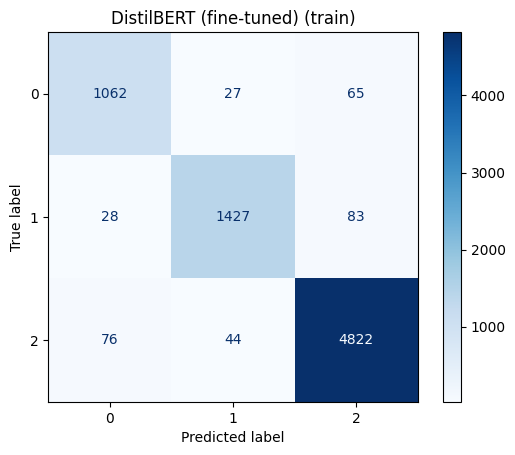


=== DistilBERT (fine‑tuned) (val) ===
              precision    recall  f1-score   support

           0      0.733     0.733     0.733       288
           1      0.811     0.748     0.778       385
           2      0.896     0.917     0.906      1236

    accuracy                          0.855      1909
   macro avg      0.813     0.799     0.806      1909
weighted avg      0.854     0.855     0.854      1909



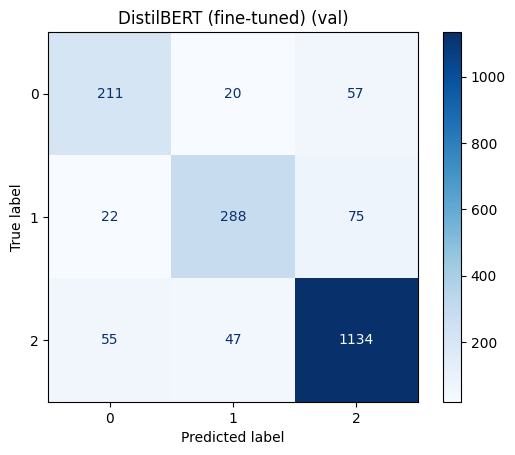

In [ ]:
# Predict on validation (probabilities - class index)
val_logits = trainer.predict(hf_val).predictions
bert_pred_val = val_logits.argmax(axis=1)

train_logits = trainer.predict(hf_train).predictions
bert_pred_train = train_logits.argmax(axis=1)

evaluate(y_train, bert_pred_train, title="DistilBERT (fine‑tuned) (train)")
evaluate(y_val, bert_pred_val, title="DistilBERT (fine‑tuned) (val)")

# 4.7. RoBERTa

Here we use the raw dataset

In [ ]:
# Combine into HuggingFace Dataset format
train_data = Dataset.from_dict({"text": X_train, "label": y_train})
val_data = Dataset.from_dict({"text": X_val, "label": y_val})

In [ ]:
tokenizer = RobertaTokenizer.from_pretrained("roberta-base")

def tokenize(batch):
    return tokenizer(batch["text"], truncation=True, padding="max_length", max_length=128)

train_data = train_data.map(tokenize, batched=True)
val_data = val_data.map(tokenize, batched=True)

train_data.set_format("torch", columns=["input_ids", "attention_mask", "label"])
val_data.set_format("torch", columns=["input_ids", "attention_mask", "label"])


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

Map:   0%|          | 0/7634 [00:00<?, ? examples/s]

Map:   0%|          | 0/1909 [00:00<?, ? examples/s]

In [ ]:
model = RobertaForSequenceClassification.from_pretrained("roberta-base", num_labels=3)

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [ ]:
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = logits.argmax(axis=-1)
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc}

In [ ]:
# Training arguments
training_args = TrainingArguments(
    output_dir="./roberta-sentiment",
    run_name="roberta-classification",
    eval_strategy="epoch",
    save_strategy="epoch",
    logging_strategy="epoch",
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    load_best_model_at_end=True,
    report_to="none"
)

In [ ]:
# Train the model
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_data,
    eval_dataset=val_data,
    compute_metrics=compute_metrics,
)

trainer.train()

{'loss': 0.4973, 'grad_norm': 1.6522244215011597, 'learning_rate': 3.3368200836820085e-05, 'epoch': 1.0}
{'eval_loss': 0.35206279158592224, 'eval_accuracy': 0.8878994237820849, 'eval_runtime': 12.0545, 'eval_samples_per_second': 158.365, 'eval_steps_per_second': 9.955, 'epoch': 1.0}
{'loss': 0.2689, 'grad_norm': 12.572651863098145, 'learning_rate': 1.6701534170153417e-05, 'epoch': 2.0}
{'eval_loss': 0.35714787244796753, 'eval_accuracy': 0.8768988999476166, 'eval_runtime': 11.7174, 'eval_samples_per_second': 162.92, 'eval_steps_per_second': 10.241, 'epoch': 2.0}
{'loss': 0.1618, 'grad_norm': 362.13409423828125, 'learning_rate': 3.486750348675035e-08, 'epoch': 3.0}
{'eval_loss': 0.4668342173099518, 'eval_accuracy': 0.892613933996857, 'eval_runtime': 11.7044, 'eval_samples_per_second': 163.101, 'eval_steps_per_second': 10.253, 'epoch': 3.0}
{'train_runtime': 606.729, 'train_samples_per_second': 37.747, 'train_steps_per_second': 2.363, 'train_loss': 0.30936014768635045, 'epoch': 3.0}


TrainOutput(global_step=1434, training_loss=0.30936014768635045, metrics={'train_runtime': 606.729, 'train_samples_per_second': 37.747, 'train_steps_per_second': 2.363, 'train_loss': 0.30936014768635045, 'epoch': 3.0})


=== RoBERTa (train) ===
              precision    recall  f1-score   support

           0      0.885     0.830     0.857      1154
           1      0.909     0.872     0.890      1538
           2      0.935     0.961     0.948      4942

    accuracy                          0.923      7634
   macro avg      0.910     0.888     0.898      7634
weighted avg      0.922     0.923     0.922      7634



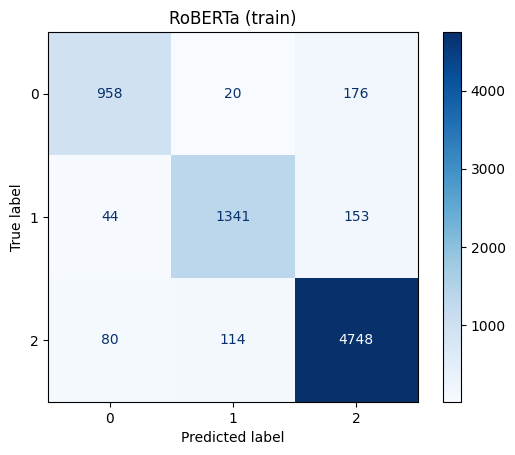


=== RoBERTa (val) ===
              precision    recall  f1-score   support

           0      0.840     0.781     0.809       288
           1      0.856     0.803     0.828       385
           2      0.907     0.939     0.923      1236

    accuracy                          0.888      1909
   macro avg      0.868     0.841     0.854      1909
weighted avg      0.887     0.888     0.887      1909



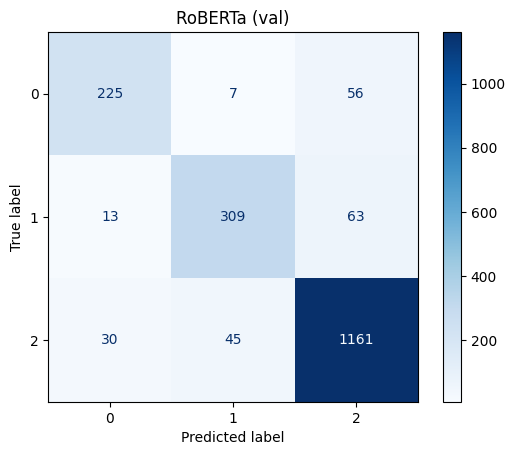

In [ ]:
preds_val = trainer.predict(val_data)
roberta_pred_val = preds_val.predictions.argmax(axis=-1)

preds_train = trainer.predict(train_data)
roberta_pred_train = preds_train.predictions.argmax(axis=-1)

evaluate(y_train, roberta_pred_train, title="RoBERTa (train)")
evaluate(y_val, roberta_pred_val, title="RoBERTa (val)")

# 5. Evaluation

In [ ]:
def metrics(y_true, y_pred):
    return accuracy_score(y_true, y_pred), f1_score(y_true, y_pred, average='macro'), precision_score(y_true, y_pred, average='macro'), recall_score(y_true, y_pred, average='macro')


In [ ]:
rows_train = []
for name, pred in [("BoW+KNN", knn_pred_train), ("TF-IDF+GNB", nb_pred_train), ("TF-IDF+LR", lr_pred_train), ("T5+LR", t5_pred_train),
                   ("W2V+BiLSTM", lstm_pred_train)]:
    acc_train, f1_train, prec_train, rec_train = metrics(y_train, pred)
    rows_train.append({"Model": name, "Accuracy": acc_train, "Macro F1": f1_train, "Precision": prec_train, "Recall": rec_train})

comp_df_train = pd.DataFrame(rows_train)
print("--------Train scores-------- \n", comp_df_train.to_string(index=False))

rows_val = []
for name, pred in [("BoW+KNN", knn_pred_val), ("TF-IDF+GNB", nb_pred_val), ("TF-IDF+LR", lr_pred_val), ("T5+LR", t5_pred_val),
                   ("W2V+BiLSTM", lstm_pred_val)]:
    acc_val, f1_val, prec_val, rec_val = metrics(y_val, pred)
    rows_val.append({"Model": name, "Accuracy": acc_val, "Macro F1": f1_val, "Precision": prec_val, "Recall": rec_val})

comp_df_val = pd.DataFrame(rows_val)
print("\n--------Val scores-------- \n",comp_df_val.to_string(index=False))

--------Train scores-------- 
      Model  Accuracy  Macro F1  Precision   Recall
   BoW+KNN  0.999476  0.999285   0.999211 0.999360
TF-IDF+GNB  0.996725  0.995883   0.993636 0.998164
 TF-IDF+LR  0.883285  0.832712   0.939310 0.774803
     T5+LR  0.851585  0.795326   0.829556 0.769587
W2V+BiLSTM  0.820278  0.741240   0.775183 0.716698

--------Val scores-------- 
      Model  Accuracy  Macro F1  Precision   Recall
   BoW+KNN  0.782085  0.663288   0.743139 0.628495
TF-IDF+GNB  0.729701  0.623226   0.639770 0.610897
 TF-IDF+LR  0.785752  0.663961   0.792345 0.617307
     T5+LR  0.797276  0.714459   0.740496 0.695035
W2V+BiLSTM  0.764274  0.654742   0.676129 0.639109


In [ ]:
rows_train = []
for name, pred in [("DestilBERT", bert_pred_train), ("RoBERTa", roberta_pred_train)]:
    acc_train, f1_train, prec_train, rec_train = metrics(y_train, pred)
    rows_train.append({"Model": name, "Accuracy": acc_train, "Macro F1": f1_train, "Precision": prec_train, "Recall": rec_train})

comp_df_train = pd.DataFrame(rows_train)
print("--------Train scores-------- \n", comp_df_train.to_string(index=False))

rows_val = []
for name, pred in [("DestilBERT", bert_pred_val), ("RoBERTa", roberta_pred_val)]:
    acc_val, f1_val, prec_val, rec_val = metrics(y_val, pred)
    rows_val.append({"Model": name, "Accuracy": acc_val, "Macro F1": f1_val, "Precision": prec_val, "Recall": rec_val})

comp_df_val = pd.DataFrame(rows_val)
print("\n--------Val scores-------- \n",comp_df_val.to_string(index=False))

--------Train scores-------- 
      Model  Accuracy  Macro F1  Precision   Recall
DestilBERT  0.957689  0.942844   0.944544 0.941275
   RoBERTa  0.923107  0.898276   0.909916 0.887604

--------Val scores-------- 
      Model  Accuracy  Macro F1  Precision   Recall
DestilBERT  0.855422  0.805831   0.813214 0.799389
   RoBERTa  0.887899  0.853555   0.867513 0.841056


# 6. Fine tuning best model: RoBERTa

- finetune the model using optuna

In [ ]:
# Combine into HuggingFace Dataset format
train_data = Dataset.from_dict({"text": X_train, "label": y_train})
val_data = Dataset.from_dict({"text": X_val, "label": y_val})

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("roberta-base")

def tokenize(batch):
    return tokenizer(batch["text"], truncation=True, padding="max_length", max_length=128)

train_data = train_data.map(tokenize, batched=True)
val_data = val_data.map(tokenize, batched=True)

train_data.set_format("torch", columns=["input_ids", "attention_mask", "label"])
val_data.set_format("torch", columns=["input_ids", "attention_mask", "label"])


Map:   0%|          | 0/7634 [00:00<?, ? examples/s]

Map:   0%|          | 0/1909 [00:00<?, ? examples/s]

In [ ]:
def model_init():
    return AutoModelForSequenceClassification.from_pretrained("roberta-base", num_labels=3)


In [ ]:
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    preds = logits.argmax(axis=-1)
    f1 = f1_score(labels, preds, average="macro")
    return {"f1": f1}


In [ ]:
def optuna_objective(trial):
    # Suggest hyperparameters
    learning_rate = trial.suggest_float("learning_rate", 1e-5, 5e-5, log=True)
    weight_decay = trial.suggest_float("weight_decay", 0.0, 0.3)
    per_device_batch_size = trial.suggest_categorical("per_device_batch_size", [8, 16, 32])
    num_train_epochs = trial.suggest_int("num_train_epochs", 2, 6)

    # Training arguments
    training_args = TrainingArguments(
        output_dir="./optuna-roberta",
        eval_strategy="epoch",
        save_strategy="no",
        logging_strategy="no",
        learning_rate=learning_rate,
        per_device_train_batch_size=per_device_batch_size,
        per_device_eval_batch_size=per_device_batch_size,
        num_train_epochs=num_train_epochs,
        weight_decay=weight_decay,
        report_to="none",  # suppress output
    )

    # Train the model
    trainer = Trainer(
        model_init=model_init,
        args=training_args,
        train_dataset=train_data,
        eval_dataset=val_data,
        compute_metrics=compute_metrics,
    )

    trainer.train()
    eval_result = trainer.evaluate()
    return eval_result["eval_f1"]


In [ ]:
#Run the optimization
study = optuna.create_study(direction="maximize")
study.optimize(optuna_objective, n_trials=20)

[I 2025-06-14 17:18:21,982] A new study created in memory with name: no-name-19707bc7-4923-468f-a780-040a3cee970c


{'eval_loss': 0.317936509847641, 'eval_f1': 0.8517063917419966, 'eval_runtime': 11.5857, 'eval_samples_per_second': 164.772, 'eval_steps_per_second': 10.358, 'epoch': 1.0}
{'eval_loss': 0.333537220954895, 'eval_f1': 0.8604399581570745, 'eval_runtime': 11.6379, 'eval_samples_per_second': 164.033, 'eval_steps_per_second': 10.311, 'epoch': 2.0}
{'train_runtime': 346.9414, 'train_samples_per_second': 44.007, 'train_steps_per_second': 2.756, 'train_loss': 0.3564168060175046, 'epoch': 2.0}


[I 2025-06-14 17:24:23,037] Trial 0 finished with value: 0.8604399581570745 and parameters: {'learning_rate': 1.800457646101782e-05, 'weight_decay': 0.025832455347077676, 'per_device_batch_size': 16, 'num_train_epochs': 2}. Best is trial 0 with value: 0.8604399581570745.


{'eval_loss': 0.333537220954895, 'eval_f1': 0.8604399581570745, 'eval_runtime': 11.5911, 'eval_samples_per_second': 164.696, 'eval_steps_per_second': 10.353, 'epoch': 2.0}
{'eval_loss': 0.33161526918411255, 'eval_f1': 0.8352452744648802, 'eval_runtime': 11.6015, 'eval_samples_per_second': 164.548, 'eval_steps_per_second': 10.344, 'epoch': 1.0}
{'eval_loss': 0.35955777764320374, 'eval_f1': 0.8586125235676231, 'eval_runtime': 11.5872, 'eval_samples_per_second': 164.75, 'eval_steps_per_second': 10.356, 'epoch': 2.0}
{'eval_loss': 0.34509629011154175, 'eval_f1': 0.8676908754912199, 'eval_runtime': 11.6536, 'eval_samples_per_second': 163.813, 'eval_steps_per_second': 10.297, 'epoch': 3.0}
{'eval_loss': 0.4620702266693115, 'eval_f1': 0.8646746091632697, 'eval_runtime': 11.5942, 'eval_samples_per_second': 164.651, 'eval_steps_per_second': 10.35, 'epoch': 4.0}
{'eval_loss': 0.49936816096305847, 'eval_f1': 0.8565686654892333, 'eval_runtime': 11.5871, 'eval_samples_per_second': 164.752, 'eval_st

[I 2025-06-14 17:39:03,189] Trial 1 finished with value: 0.8565686654892333 and parameters: {'learning_rate': 1.1665289862459577e-05, 'weight_decay': 0.05717495296710329, 'per_device_batch_size': 16, 'num_train_epochs': 5}. Best is trial 0 with value: 0.8604399581570745.


{'eval_loss': 0.49936816096305847, 'eval_f1': 0.8565686654892333, 'eval_runtime': 11.5375, 'eval_samples_per_second': 165.461, 'eval_steps_per_second': 10.401, 'epoch': 5.0}
{'eval_loss': 0.44079267978668213, 'eval_f1': 0.8043073860742306, 'eval_runtime': 11.8437, 'eval_samples_per_second': 161.183, 'eval_steps_per_second': 20.179, 'epoch': 1.0}
{'eval_loss': 0.5012134313583374, 'eval_f1': 0.8498923879756722, 'eval_runtime': 11.856, 'eval_samples_per_second': 161.015, 'eval_steps_per_second': 20.159, 'epoch': 2.0}
{'eval_loss': 0.5690593123435974, 'eval_f1': 0.8550360357557647, 'eval_runtime': 11.8572, 'eval_samples_per_second': 160.999, 'eval_steps_per_second': 20.157, 'epoch': 3.0}
{'eval_loss': 0.6442818641662598, 'eval_f1': 0.8654550903950508, 'eval_runtime': 11.8398, 'eval_samples_per_second': 161.236, 'eval_steps_per_second': 20.186, 'epoch': 4.0}
{'train_runtime': 800.9627, 'train_samples_per_second': 38.124, 'train_steps_per_second': 4.769, 'train_loss': 0.3464031119621237, 'ep

[I 2025-06-14 17:52:37,182] Trial 2 finished with value: 0.8654550903950508 and parameters: {'learning_rate': 4.4527126020455216e-05, 'weight_decay': 0.09755354569722877, 'per_device_batch_size': 8, 'num_train_epochs': 4}. Best is trial 2 with value: 0.8654550903950508.


{'eval_loss': 0.6442818641662598, 'eval_f1': 0.8654550903950508, 'eval_runtime': 11.8206, 'eval_samples_per_second': 161.497, 'eval_steps_per_second': 20.219, 'epoch': 4.0}
{'eval_loss': 0.3382294178009033, 'eval_f1': 0.848246675259087, 'eval_runtime': 10.7329, 'eval_samples_per_second': 177.865, 'eval_steps_per_second': 5.59, 'epoch': 1.0}
{'eval_loss': 0.3183809816837311, 'eval_f1': 0.8523329021256125, 'eval_runtime': 10.7587, 'eval_samples_per_second': 177.439, 'eval_steps_per_second': 5.577, 'epoch': 2.0}
{'eval_loss': 0.33498117327690125, 'eval_f1': 0.8673129023452048, 'eval_runtime': 10.7351, 'eval_samples_per_second': 177.829, 'eval_steps_per_second': 5.589, 'epoch': 3.0}
{'eval_loss': 0.4226984977722168, 'eval_f1': 0.867398622685208, 'eval_runtime': 10.7222, 'eval_samples_per_second': 178.042, 'eval_steps_per_second': 5.596, 'epoch': 4.0}
{'eval_loss': 0.4408225119113922, 'eval_f1': 0.8738499841206572, 'eval_runtime': 10.6923, 'eval_samples_per_second': 178.539, 'eval_steps_per

[I 2025-06-14 18:05:42,096] Trial 3 finished with value: 0.8738499841206572 and parameters: {'learning_rate': 3.160429939054179e-05, 'weight_decay': 0.06631200680705565, 'per_device_batch_size': 32, 'num_train_epochs': 5}. Best is trial 3 with value: 0.8738499841206572.


{'eval_loss': 0.4408225119113922, 'eval_f1': 0.8738499841206572, 'eval_runtime': 10.6828, 'eval_samples_per_second': 178.699, 'eval_steps_per_second': 5.617, 'epoch': 5.0}
{'eval_loss': 0.4223114252090454, 'eval_f1': 0.8227725425986715, 'eval_runtime': 11.8485, 'eval_samples_per_second': 161.118, 'eval_steps_per_second': 20.171, 'epoch': 1.0}
{'eval_loss': 0.44742846488952637, 'eval_f1': 0.8609992247387871, 'eval_runtime': 11.8497, 'eval_samples_per_second': 161.1, 'eval_steps_per_second': 20.169, 'epoch': 2.0}
{'eval_loss': 0.5012547969818115, 'eval_f1': 0.8658674824519935, 'eval_runtime': 11.8228, 'eval_samples_per_second': 161.467, 'eval_steps_per_second': 20.215, 'epoch': 3.0}
{'train_runtime': 600.9205, 'train_samples_per_second': 38.112, 'train_steps_per_second': 4.768, 'train_loss': 0.34271532095331586, 'epoch': 3.0}


[I 2025-06-14 18:15:56,005] Trial 4 finished with value: 0.8658674824519935 and parameters: {'learning_rate': 1.0731336671580794e-05, 'weight_decay': 0.08080424929791323, 'per_device_batch_size': 8, 'num_train_epochs': 3}. Best is trial 3 with value: 0.8738499841206572.


{'eval_loss': 0.5012547969818115, 'eval_f1': 0.8658674824519935, 'eval_runtime': 11.7917, 'eval_samples_per_second': 161.894, 'eval_steps_per_second': 20.269, 'epoch': 3.0}
{'eval_loss': 0.4255339801311493, 'eval_f1': 0.8213615669872384, 'eval_runtime': 11.8591, 'eval_samples_per_second': 160.974, 'eval_steps_per_second': 20.153, 'epoch': 1.0}
{'eval_loss': 0.4568873345851898, 'eval_f1': 0.8602238309773127, 'eval_runtime': 11.8419, 'eval_samples_per_second': 161.208, 'eval_steps_per_second': 20.183, 'epoch': 2.0}
{'train_runtime': 400.683, 'train_samples_per_second': 38.105, 'train_steps_per_second': 4.767, 'train_loss': 0.3942096170954679, 'epoch': 2.0}


[I 2025-06-14 18:22:49,696] Trial 5 finished with value: 0.8602238309773127 and parameters: {'learning_rate': 2.8629814422254174e-05, 'weight_decay': 0.08513060694178201, 'per_device_batch_size': 8, 'num_train_epochs': 2}. Best is trial 3 with value: 0.8738499841206572.


{'eval_loss': 0.4568873345851898, 'eval_f1': 0.8602238309773127, 'eval_runtime': 11.805, 'eval_samples_per_second': 161.711, 'eval_steps_per_second': 20.246, 'epoch': 2.0}
{'eval_loss': 0.40705224871635437, 'eval_f1': 0.8143476371218147, 'eval_runtime': 10.7293, 'eval_samples_per_second': 177.925, 'eval_steps_per_second': 5.592, 'epoch': 1.0}
{'eval_loss': 0.3582381308078766, 'eval_f1': 0.8497190287121325, 'eval_runtime': 10.7231, 'eval_samples_per_second': 178.027, 'eval_steps_per_second': 5.595, 'epoch': 2.0}
{'eval_loss': 0.3646707236766815, 'eval_f1': 0.8597726284287663, 'eval_runtime': 10.717, 'eval_samples_per_second': 178.128, 'eval_steps_per_second': 5.599, 'epoch': 3.0}
{'eval_loss': 0.41857028007507324, 'eval_f1': 0.863747096233638, 'eval_runtime': 10.7376, 'eval_samples_per_second': 177.787, 'eval_steps_per_second': 5.588, 'epoch': 4.0}
{'eval_loss': 0.5612896680831909, 'eval_f1': 0.8625553261666998, 'eval_runtime': 10.7279, 'eval_samples_per_second': 177.946, 'eval_steps_pe

[I 2025-06-14 18:38:29,617] Trial 6 finished with value: 0.8633418708986206 and parameters: {'learning_rate': 4.807375643069175e-05, 'weight_decay': 0.26041996018431596, 'per_device_batch_size': 32, 'num_train_epochs': 6}. Best is trial 3 with value: 0.8738499841206572.


{'eval_loss': 0.6046087741851807, 'eval_f1': 0.8633418708986206, 'eval_runtime': 10.6844, 'eval_samples_per_second': 178.672, 'eval_steps_per_second': 5.616, 'epoch': 6.0}
{'eval_loss': 0.3688289225101471, 'eval_f1': 0.8285575537307025, 'eval_runtime': 10.7133, 'eval_samples_per_second': 178.19, 'eval_steps_per_second': 5.601, 'epoch': 1.0}
{'eval_loss': 0.31769895553588867, 'eval_f1': 0.8577431934520222, 'eval_runtime': 10.73, 'eval_samples_per_second': 177.913, 'eval_steps_per_second': 5.592, 'epoch': 2.0}
{'train_runtime': 309.3414, 'train_samples_per_second': 49.356, 'train_steps_per_second': 1.545, 'train_loss': 0.3847182844473228, 'epoch': 2.0}


[I 2025-06-14 18:43:50,827] Trial 7 finished with value: 0.8577431934520222 and parameters: {'learning_rate': 1.987708618399376e-05, 'weight_decay': 0.031236690406220957, 'per_device_batch_size': 32, 'num_train_epochs': 2}. Best is trial 3 with value: 0.8738499841206572.


{'eval_loss': 0.31769895553588867, 'eval_f1': 0.8577431934520222, 'eval_runtime': 10.6777, 'eval_samples_per_second': 178.784, 'eval_steps_per_second': 5.619, 'epoch': 2.0}
{'eval_loss': 0.3607691824436188, 'eval_f1': 0.8336766726843935, 'eval_runtime': 10.7372, 'eval_samples_per_second': 177.794, 'eval_steps_per_second': 5.588, 'epoch': 1.0}
{'eval_loss': 0.32353606820106506, 'eval_f1': 0.8555210449353526, 'eval_runtime': 10.7261, 'eval_samples_per_second': 177.978, 'eval_steps_per_second': 5.594, 'epoch': 2.0}
{'eval_loss': 0.32950350642204285, 'eval_f1': 0.8625868337928342, 'eval_runtime': 10.7151, 'eval_samples_per_second': 178.16, 'eval_steps_per_second': 5.6, 'epoch': 3.0}
{'eval_loss': 0.4660451412200928, 'eval_f1': 0.8591626081591968, 'eval_runtime': 10.7231, 'eval_samples_per_second': 178.027, 'eval_steps_per_second': 5.595, 'epoch': 4.0}
{'eval_loss': 0.4749424159526825, 'eval_f1': 0.8689570044150875, 'eval_runtime': 10.7382, 'eval_samples_per_second': 177.777, 'eval_steps_pe

[I 2025-06-14 18:56:56,087] Trial 8 finished with value: 0.8689570044150875 and parameters: {'learning_rate': 3.796396807957975e-05, 'weight_decay': 0.26427079789064667, 'per_device_batch_size': 32, 'num_train_epochs': 5}. Best is trial 3 with value: 0.8738499841206572.


{'eval_loss': 0.4749424159526825, 'eval_f1': 0.8689570044150875, 'eval_runtime': 10.7234, 'eval_samples_per_second': 178.022, 'eval_steps_per_second': 5.595, 'epoch': 5.0}
{'eval_loss': 0.42691853642463684, 'eval_f1': 0.8266957421456235, 'eval_runtime': 11.8618, 'eval_samples_per_second': 160.936, 'eval_steps_per_second': 20.149, 'epoch': 1.0}
{'eval_loss': 0.4671895205974579, 'eval_f1': 0.8548619038959782, 'eval_runtime': 11.8395, 'eval_samples_per_second': 161.24, 'eval_steps_per_second': 20.187, 'epoch': 2.0}
{'eval_loss': 0.4772811532020569, 'eval_f1': 0.8662658895243087, 'eval_runtime': 11.8454, 'eval_samples_per_second': 161.159, 'eval_steps_per_second': 20.177, 'epoch': 3.0}
{'eval_loss': 0.5484398007392883, 'eval_f1': 0.8755830312474231, 'eval_runtime': 11.8038, 'eval_samples_per_second': 161.728, 'eval_steps_per_second': 20.248, 'epoch': 4.0}
{'eval_loss': 0.6411899924278259, 'eval_f1': 0.8679468605089626, 'eval_runtime': 11.8224, 'eval_samples_per_second': 161.473, 'eval_step

[I 2025-06-14 19:17:11,267] Trial 9 finished with value: 0.8721056579214665 and parameters: {'learning_rate': 2.562300123559768e-05, 'weight_decay': 0.2125477184891311, 'per_device_batch_size': 8, 'num_train_epochs': 6}. Best is trial 3 with value: 0.8738499841206572.


{'eval_loss': 0.6781575083732605, 'eval_f1': 0.8721056579214665, 'eval_runtime': 11.799, 'eval_samples_per_second': 161.794, 'eval_steps_per_second': 20.256, 'epoch': 6.0}
{'eval_loss': 0.34003502130508423, 'eval_f1': 0.8431721119098019, 'eval_runtime': 10.7418, 'eval_samples_per_second': 177.718, 'eval_steps_per_second': 5.586, 'epoch': 1.0}
{'eval_loss': 0.30041638016700745, 'eval_f1': 0.8563030173973926, 'eval_runtime': 10.7021, 'eval_samples_per_second': 178.376, 'eval_steps_per_second': 5.606, 'epoch': 2.0}
{'eval_loss': 0.31212949752807617, 'eval_f1': 0.8698310121633502, 'eval_runtime': 10.7406, 'eval_samples_per_second': 177.736, 'eval_steps_per_second': 5.586, 'epoch': 3.0}
{'eval_loss': 0.3845280110836029, 'eval_f1': 0.8700972832116117, 'eval_runtime': 10.707, 'eval_samples_per_second': 178.294, 'eval_steps_per_second': 5.604, 'epoch': 4.0}
{'train_runtime': 618.5595, 'train_samples_per_second': 49.366, 'train_steps_per_second': 1.546, 'train_loss': 0.252927660443294, 'epoch':

[I 2025-06-14 19:27:41,687] Trial 10 finished with value: 0.8700972832116117 and parameters: {'learning_rate': 3.3621441859659676e-05, 'weight_decay': 0.15800572422890957, 'per_device_batch_size': 32, 'num_train_epochs': 4}. Best is trial 3 with value: 0.8738499841206572.


{'eval_loss': 0.3845280110836029, 'eval_f1': 0.8700972832116117, 'eval_runtime': 10.6896, 'eval_samples_per_second': 178.585, 'eval_steps_per_second': 5.613, 'epoch': 4.0}
{'eval_loss': 0.4262373149394989, 'eval_f1': 0.8209854720173239, 'eval_runtime': 11.8433, 'eval_samples_per_second': 161.188, 'eval_steps_per_second': 20.18, 'epoch': 1.0}
{'eval_loss': 0.5053789019584656, 'eval_f1': 0.8425153019409142, 'eval_runtime': 11.826, 'eval_samples_per_second': 161.424, 'eval_steps_per_second': 20.21, 'epoch': 2.0}
{'eval_loss': 0.4980812966823578, 'eval_f1': 0.8588287213515494, 'eval_runtime': 11.8282, 'eval_samples_per_second': 161.394, 'eval_steps_per_second': 20.206, 'epoch': 3.0}
{'eval_loss': 0.5824986100196838, 'eval_f1': 0.8666358617475303, 'eval_runtime': 11.8589, 'eval_samples_per_second': 160.976, 'eval_steps_per_second': 20.154, 'epoch': 4.0}
{'eval_loss': 0.7078946232795715, 'eval_f1': 0.8624966664296143, 'eval_runtime': 11.8237, 'eval_samples_per_second': 161.455, 'eval_steps_p

[I 2025-06-14 19:47:57,962] Trial 11 finished with value: 0.8702764823355537 and parameters: {'learning_rate': 2.6469477082912303e-05, 'weight_decay': 0.18207967561326516, 'per_device_batch_size': 8, 'num_train_epochs': 6}. Best is trial 3 with value: 0.8738499841206572.


{'eval_loss': 0.7102749347686768, 'eval_f1': 0.8702764823355537, 'eval_runtime': 11.8005, 'eval_samples_per_second': 161.772, 'eval_steps_per_second': 20.253, 'epoch': 6.0}
{'eval_loss': 0.3409028649330139, 'eval_f1': 0.8393935007928618, 'eval_runtime': 10.7346, 'eval_samples_per_second': 177.837, 'eval_steps_per_second': 5.589, 'epoch': 1.0}
{'eval_loss': 0.3222244679927826, 'eval_f1': 0.8527564626283418, 'eval_runtime': 10.7346, 'eval_samples_per_second': 177.836, 'eval_steps_per_second': 5.589, 'epoch': 2.0}
{'eval_loss': 0.2914471924304962, 'eval_f1': 0.874598698369038, 'eval_runtime': 10.7517, 'eval_samples_per_second': 177.553, 'eval_steps_per_second': 5.581, 'epoch': 3.0}
{'eval_loss': 0.3409925103187561, 'eval_f1': 0.8712464442120441, 'eval_runtime': 10.7233, 'eval_samples_per_second': 178.024, 'eval_steps_per_second': 5.595, 'epoch': 4.0}


In [ ]:
print("Best trial:")
trial = study.best_trial
print(f"Accuracy: {trial.value}")
print("Parameters:")
for key, value in trial.params.items():
    print(f"{key}: {value}")


Best trial:
Accuracy: 0.8786020444172881
Parameters:
learning_rate: 2.2480367075223853e-05
weight_decay: 0.27685297480310544
per_device_batch_size: 32
num_train_epochs: 4


In [ ]:
# Train model with best parameters
final_model = AutoModelForSequenceClassification.from_pretrained("roberta-base", num_labels=3)

training_args = TrainingArguments(
    output_dir="./roberta-sentiment-final",
    eval_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2.2480367075223853e-05,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    num_train_epochs=4,
    weight_decay=0.27685297480310544,
    report_to="none",
    load_best_model_at_end=True,
)

final_trainer = Trainer(
    model=final_model,
    args=training_args,
    train_dataset=train_data,
    eval_dataset=val_data,
    compute_metrics=compute_metrics
)

final_trainer.train()

{'eval_loss': 0.3290647566318512, 'eval_f1': 0.8484228680033397, 'eval_runtime': 11.7854, 'eval_samples_per_second': 161.98, 'eval_steps_per_second': 5.091, 'epoch': 1.0}
{'eval_loss': 0.3172687292098999, 'eval_f1': 0.8507753807129016, 'eval_runtime': 11.7418, 'eval_samples_per_second': 162.582, 'eval_steps_per_second': 5.11, 'epoch': 2.0}
{'loss': 0.3836, 'grad_norm': 7.995643138885498, 'learning_rate': 1.0746367942863286e-05, 'epoch': 2.092050209205021}
{'eval_loss': 0.3012986183166504, 'eval_f1': 0.8720084235553429, 'eval_runtime': 11.77, 'eval_samples_per_second': 162.191, 'eval_steps_per_second': 5.098, 'epoch': 3.0}
{'eval_loss': 0.3557296395301819, 'eval_f1': 0.8693793478349355, 'eval_runtime': 11.7654, 'eval_samples_per_second': 162.255, 'eval_steps_per_second': 5.1, 'epoch': 4.0}
{'train_runtime': 905.5266, 'train_samples_per_second': 33.722, 'train_steps_per_second': 1.056, 'train_loss': 0.27132124481839615, 'epoch': 4.0}


TrainOutput(global_step=956, training_loss=0.27132124481839615, metrics={'train_runtime': 905.5266, 'train_samples_per_second': 33.722, 'train_steps_per_second': 1.056, 'train_loss': 0.27132124481839615, 'epoch': 4.0})


=== RoBERTa (train) ===
              precision    recall  f1-score   support

           0      0.943     0.964     0.953      1154
           1      0.953     0.972     0.962      1538
           2      0.986     0.975     0.981      4942

    accuracy                          0.973      7634
   macro avg      0.961     0.970     0.965      7634
weighted avg      0.973     0.973     0.973      7634



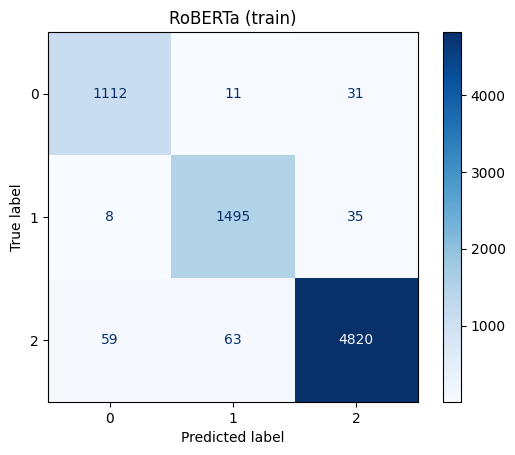


=== RoBERTa (val) ===
              precision    recall  f1-score   support

           0      0.799     0.882     0.838       288
           1      0.850     0.855     0.852       385
           2      0.938     0.913     0.925      1236

    accuracy                          0.897      1909
   macro avg      0.862     0.883     0.872      1909
weighted avg      0.899     0.897     0.898      1909



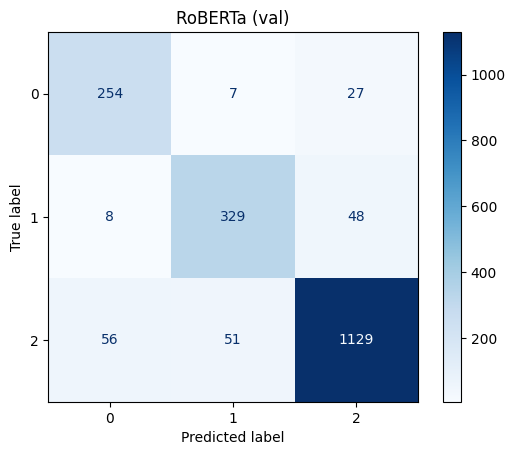

In [ ]:
preds_val = final_trainer.predict(val_data)
roberta_pred_val = preds_val.predictions.argmax(axis=-1)

preds_train = final_trainer.predict(train_data)
roberta_pred_train = preds_train.predictions.argmax(axis=-1)

evaluate(y_train, roberta_pred_train, title="RoBERTa (train)")
evaluate(y_val, roberta_pred_val, title="RoBERTa (val)")

In [ ]:
rows_train = []
for name, pred in [("RoBERTa", roberta_pred_train)]:
    acc_train, f1_train, prec_train, rec_train = metrics(y_train, pred)
    rows_train.append({"Model": name, "Accuracy": acc_train, "Macro F1": f1_train, "Precision": prec_train, "Recall": rec_train})

comp_df_train = pd.DataFrame(rows_train)
print("--------Train scores-------- \n", comp_df_train.to_string(index=False))

rows_val = []
for name, pred in [("RoBERTa", roberta_pred_val)]:
    acc_val, f1_val, prec_val, rec_val = metrics(y_val, pred)
    rows_val.append({"Model": name, "Accuracy": acc_val, "Macro F1": f1_val, "Precision": prec_val, "Recall": rec_val})

comp_df_val = pd.DataFrame(rows_val)
print("\n--------Val scores-------- \n",comp_df_val.to_string(index=False))

--------Train scores-------- 
   Model  Accuracy  Macro F1  Precision  Recall
RoBERTa  0.972884  0.965498   0.960833 0.97032

--------Val scores-------- 
   Model  Accuracy  Macro F1  Precision   Recall
RoBERTa  0.896805  0.872008   0.862193 0.883307
